In [44]:
import pandas as pd
import thinkstats2
import thinkplot
import sys
import math
import numpy as np
import nsfg
import random

Using data from the NSFG, make a scatter plot of birth weight versus mother's age. Plot the percentiles of birth weight versus mother's age. computer pearson's and spearman's correlations. how would you characterize the relationship between there variables? 

In [45]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

babies = live.totalwgt_lb
moms = live.agepreg
live = live[['agepreg', 'totalwgt_lb']].dropna()

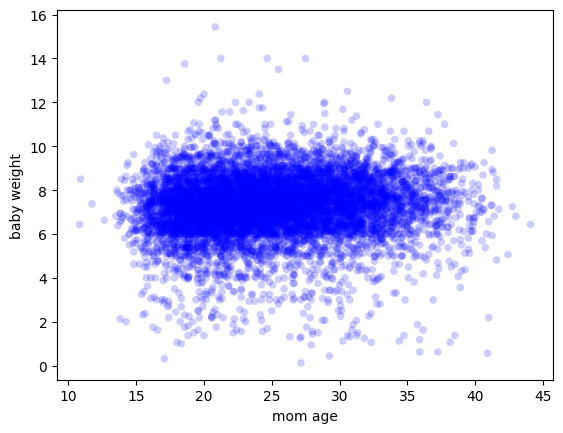

<Figure size 800x600 with 0 Axes>

In [46]:
thinkplot.Scatter(live.agepreg, live.totalwgt_lb)
thinkplot.Show(xlabel = 'mom age' , ylabel = 'baby weight')

In [47]:
# cor(live.agepreg, live.totalwgt_lb, method=c("pearson"))
# cor(live.agepreg, live.totalwgt_lb, method=c("spearman"))
# round(thinkstats2.Corr(moms,babies),3)

#I'm pretty sure that the below is correct but it's not working for some reason? #Corr = 0.069 and Sprearman Corr 0.095. 
#because both variables are so close to 0 they are not correlated
thinkstats2.Corr(moms,babies)
thinkstats2.SpearmanCorr(moms,babies)



nan

In this chapter we use X and median to estimate u and found the x yields lower MSE. Also we used S2 and S2m-1 to estimate o, and found that s2 is biased and s2n-1 is unbiased. Run similar experiments to see if x and median are biased estimates of u. also check whether s2 or s2n-1 yields a lower MSE. 


In [72]:
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [73]:
def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [103]:
def Estimate4(n=7, m =1000):
    mu = 0
    sigma = 1
    
    mean1 = []
    median1 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
#         biased = np.var(xs)
#         unbiased = np.var(xs, ddof=1)
        xbar = np.mean(xs)
        median = np.median(xs)
        mean1.append(xbar)
        median1.append(median)
    print("mean xbar", MeanError(mean1,mu))
    print("mean median", MeanError(median1,mu))

def Estimate5(n=7, m =1000):
    mu = 0
    sigma = 1
    
    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs,ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)
    print("biased", RMSE(estimates1,sigma**2))
    print("unbiased", RMSE(estimates2,sigma**2))

In [104]:
Estimate4()
Estimate5()


biased 0.5487536935998677
unbiased 0.6262122758176938
mean xbar -0.007511671421491805
mean median -0.0026188919603957767


In [105]:
def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)


def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return math.sqrt(mse)


def Estimate1(n=7, m=1000):
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))


def Estimate2(n=7, m=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))


def Estimate3(n=7, m=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(m):
        xs = np.random.exponential(1/lam, n)
        L = 1 / np.mean(xs)
        Lm = math.log(2) / np.median(xs)
        means.append(L)
        medians.append(Lm)

    print('Experiment 3')
    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))

In [106]:
Estimate1()
Estimate2()
Estimate3()

Experiment 1
rmse xbar 0.3694766451191715
rmse median 0.45685512144147034
Experiment 2
mean error biased -0.12328831463590728
mean error unbiased 0.0228302995914415
Experiment 3
rmse L 1.090281913641486
rmse Lm 2.5293175093633087
mean error L 0.3372512782461428
mean error Lm 0.5562930196963932


every time this code is run, the biased is always lower than the unbiased. Ran this experiement several times with different mu values and the xbar and median are still around the same. 

Suppose that you draw a sample with size n = 10 from an exponential distribution with y = 2. simulate this experiemnt 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval. 

In [125]:
def SimulateSample(lam = 2, n=1000, m=1000):
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    means = []
    medians = []
    for _ in range(m):
        xs = np.random.exponential(1/lam, n)
        L = 1/np.mean(xs)
        Lm = math.log(2)/thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    stderr = RMSE(means, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='sample mean',
                   ylabel='CDF',
                   title='Sampling distribution')


standard error 0.06147241296155891
confidence interval (1.9082783509680437, 2.1138037568969654)


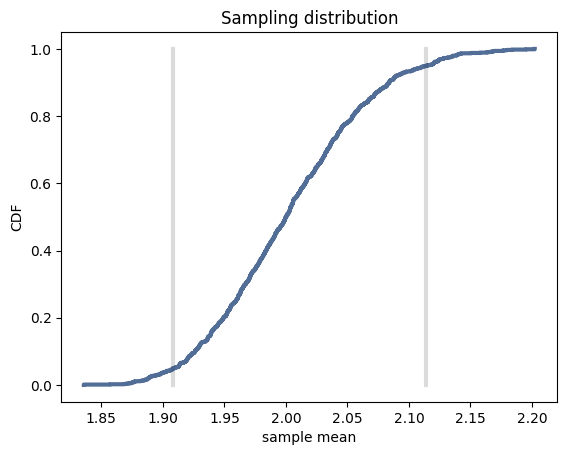

In [126]:
SimulateSample()

n = 10
standard error 0.794375474411317
confidence interval (1.257470082393684, 3.621910875689459)
n = 1000
standard error 0.061209087943067
confidence interval (1.9104836450562614, 2.1085980938887725)

The standard error is much lower the more times that the equation is run, which makes sense. More data should result in lower standard error. The confidence interval is also much tighter with more times run. THe plot looks much cleaner with the more runs as well. 

I left the confidence interal at 95% instead of changing it to 90% since the equation came almost straight out of the estimation.py section of the book. 
